# Aim: To simulate for 10 assets on IBM qunatum Cloud by increasing the no of alphas , changing different classical optimisers namely COBYLA ,CG POWELL,GradientDescent and trying to run it on qasm simulator , fake backends i.e. Fake Mumbai, Fake Washington , Fake Torronto

In [1]:
from qiskit.algorithms.optimizers import COBYLA,CG,POWELL, GradientDescent
from qiskit.algorithms import NumPyMinimumEigensolver, VQE,QAOA
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import LinearEqualityToPenalty
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.translators import from_docplex_mp
from qiskit import execute, Aer
from qiskit.utils import algorithm_globals

import numpy as np
import matplotlib.pyplot as plt
from docplex.mp.model import Model

In [4]:
import numpy as np

In [5]:
#maruti,ongc,tatasteel,hindalco,icici
mu5 = np.array([-0.01278393459,-0.01757157357,0.00153724791,-0.015034464,-0.015034464])#maruti,ongc,tatasteel,hindalco,icici

#maruti,ongc,tatasteel,hindalco,icici,britannia,ultra,wipro
mu8 = np.array([-0.01278393459,-0.01757157357,0.00153724791,-0.015034464,-0.015034464,-0.01387133952,-0.01447346195,
                -0.01674339724])

#maruti,ongc,tatasteel,hindalco,icici,britannia,ultra,wipro,apollo,jublfoods
mu10 = np.array([-0.01278393459,-0.01757157357,0.00153724791,-0.015034464,-0.015034464,-0.01387133952,-0.01447346195,
                -0.01674339724,-0.0132387857,-0.01195091376])

sigma5 = np.array(
    [
        [0.0157149876, 0.01543639416,0.01557457106, 0.01548754824, 0.01551981118],
        [0.01543639416,0.01626383626, 0.01518401219, 0.01572622731, 0.01547586679],
        [0.01557457106, 0.01518401219, 0.03221621237,0.01521450154, 0.01560453568],
        [0.01548754824, 0.01572622731,0.01521450154, 0.01609035237, 0.01563323403],
        [0.01551981118, 0.01547586679,0.01560453568, 0.01563323403, 0.0156661810]
        
    ]
)


sigma8 =  np.array(
    [
        [0.0157149876, 0.01543639416,0.01557457106, 0.01548754824, 0.01551981118,0.01552742087,0.01551068247,0.01549833146],
        [0.01543639416,0.01626383626, 0.01518401219, 0.01572622731, 0.01547586679, 0.01523653022,0.01540274745,0.01539792764],
        [0.01557457106, 0.01518401219, 0.03221621237,0.01521450154, 0.01560453568, 0.01568907088,0.01536051938,0.01517390478],
        [0.01548754824, 0.01572622731,0.01521450154, 0.01609035237, 0.01563323403, 0.01546962982,0.01556278296,0.01563908817],
        [0.01551981118, 0.01547586679,0.01560453568, 0.01563323403, 0.01566618101, 0.01551780546,0.01554861694,0.01554772412],
        [0.01552742087,0.01523653022, 0.01568907088, 0.01546962982, 0.01551780546,0.0156690731,0.01550048831,0.01547100286],
        [0.01551068247,0.01540274745,0.01536051938,0.01556278296,0.01554861694,0.01550048831,0.01570878379,0.01551585945],
        [0.01549833146,0.01539792764,0.01517390478,0.01563908817,0.01554772412,0.01547100286,0.01551585945,0.01568793576]
    ]
)

sigma10 = np.array(
    [
        [0.0157149876, 0.01543639416,0.01557457106, 0.01548754824, 0.01551981118,0.01552742087,0.01551068247,0.01549833146,0.01555422578,0.01560541445],
        [0.01543639416,0.01626383626, 0.01518401219, 0.01572622731, 0.01547586679, 0.01523653022,0.01540274745,0.01539792764,0.01529484431,0.01522477939],
        [0.01557457106, 0.01518401219, 0.03221621237,0.01521450154, 0.01560453568, 0.01568907088,0.01536051938,0.01517390478,0.01544208176,0.01533647982],
        [0.01548754824, 0.01572622731,0.01521450154, 0.01609035237, 0.01563323403, 0.01546962982,0.01556278296,0.01563908817,0.01556359729,0.01560570359],
        [0.01551981118, 0.01547586679,0.01560453568, 0.01563323403, 0.01566618101, 0.01551780546,0.01554861694,0.01554772412,0.01554744909,0.01561664097],
        [0.01552742087,0.01523653022, 0.01568907088, 0.01546962982, 0.01551780546, 0.0156690731,0.01550048831,0.01547100286,0.01552910437,0.0155765202],
        [0.01551068247,0.01540274745,0.01536051938,0.01556278296,0.01554861694,0.01550048831,0.01570878379,0.01551585945,0.01551281895,0.01563468601],
        [0.01549833146,0.01539792764,0.01517390478,0.01563908817,0.01554772412,0.01547100286,0.01551585945,0.01568793576,0.0155514752,0.01569287103],
        [0.01555422578,0.01529484431,0.01544208176,0.01556359729,0.01554744909,0.01552910437,0.01551281895,0.0155514752,0.0157783728,0.01565209048],
        [0.01560541445,0.01522477939,0.01533647982,0.01560570359,0.01561664097,0.0155765202,0.01563468601,0.01569287103,0.01565209048,0.0161425637]
    ]
)


In [6]:
# prepare problem instance
n = 10  # number of assets
q = 0.5  # risk factor
budget = n // 2  # budget
penalty = 2 * n  # scaling of penalty term

Creating a quadratic problem

In [9]:
# create docplex model
mdl = Model("portfolio_optimization")
x = mdl.binary_var_list(range(n), name="x")
objective = mdl.sum([mu10[i] * x[i] for i in range(n)])
objective -= q * mdl.sum([sigma10[i, j] * x[i] * x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) == budget)

# case to
qp = from_docplex_mp(mdl)

Solving the problem classically

In [28]:
%%time
opt_result = MinimumEigenOptimizer(NumPyMinimumEigensolver()).solve(qp)
print(opt_result.prettyprint())

objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS
CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 179 ms


Using a linear equality to penalty converter on the quadratic problem so that the constraints are taken into account in the objective, making the problem simpler. Converting to an ising model after that

In [11]:
# we convert the problem to an unconstrained problem for further analysis,
# otherwise this would not be necessary as the MinimumEigenSolver would do this
# translation automatically
linear2penalty = LinearEqualityToPenalty(penalty=penalty)
qp = linear2penalty.convert(qp)
_, offset = qp.to_ising()

Using cobyla optimizer and qasm simulator. We are using CVaR expectation and hence, created a list of alpha values

In [12]:
# set classical optimizer
maxiter = 100
optimizer = COBYLA(maxiter=maxiter)

# set variational ansatz
#ansatz = RealAmplitudes(n, reps=1)
#m = ansatz.num_parameters

# set backend
backend_name = "qasm_simulator"  # use this for QASM simulator
# backend_name = 'aer_simulator_statevector'  # use this for statevector simlator
backend = Aer.get_backend(backend_name)

# run variational optimization for different values of alpha
alphas = [1.0, 0.50, 0.25,0.30,0.40,0.45]  # confidence levels to be evaluated

Fitting CVaR QAOA

In [13]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=backend,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1

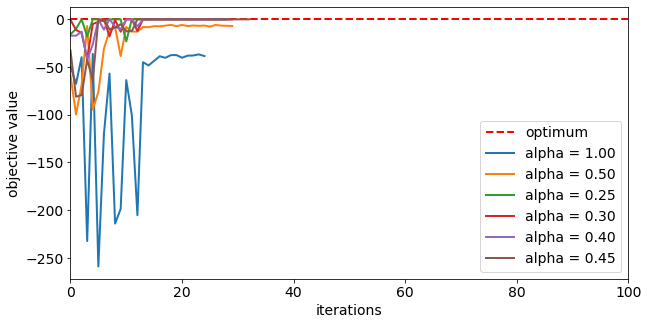

In [14]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [15]:
qaoa.ansatz.count_ops()

OrderedDict([('h', 10), ('PauliEvolution', 2)])

In [16]:
from qiskit import transpile

In [17]:
qc_basis = transpile(qaoa.ansatz, backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

In [18]:
gate_dict

OrderedDict([('cx', 90), ('u', 75)])

Finding the circuit cost

Cost is described as following in the into notebook for a maxcut problem
task_price = 0.25 # price for submitting task to system (in dollars)
price_per_CNOT = 0.0001 # price for a single CNOT gate (in dollars)
price_per_Zrot = 0.00003 # price for a single Z rotation (in dollars)
price_per_Xrot = 0.00008 # price for a single X rotation (in dollars)
price_per_shot = p (len(G.edges()) (2 price_per_CNOT + price_per_Zrot) + len(G.nodes()) price_per_Xrot)
optim_evals = res.nfev # Number of optimization steps i.e. the number of times the quantum hardware was called.
Meas_shots = shotsin # Number of measurements of quantum hardware i.e. number of times the circuit was applied to the hardware.
Cost = (Optim_evals shotsin price_per_shot) + task_price


We decided to define our cost in a similar way below. We calculate the cost for different alpha values seperately as the number of iterations required for convergence is different for different alpha values. The default number of shots is 1024. We just set cost of a single cx gate as 0.0001and the cost of a single qubit gate as 0.00005. Task price is 0.25.

In [31]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 444.15400000000005
Total cost for when alpha is 0.5: 391.93
Total cost for when alpha is 0.25: 418.04200000000003
Total cost for when alpha is 0.3: 404.98600000000005
Total cost for when alpha is 0.4: 457.21000000000004
Total cost for when alpha is 0.45: 404.98600000000005


We evaluated the cost for different alphas, but we also need to see if we are not too far away from optimal even if the cost is least for any alpha. Based on that, we could conclude which alpha works best. We can see this from the plot itself and also from the cell output where we ran QAOA, but lets print the exact optimal value here.

In [32]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2535553101149617
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2535553101149617
The optimal value with alpha 0.45: -0.2535553101149617


alpha=0.5 seems best due to slightly lower cost and the same optimal value as alpha 1, alpha 0.25,alpha 0.30,alpha 0.40,alpha 0.45. This is because alpha=0.5 led to convergence much faster.

Circuit depth

In [33]:
qc_basis.depth()

54

Optimizer time

In [34]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 96.65396475791931
Optimizer time for alpha 0.5: 73.02513885498047
Optimizer time for alpha 0.25: 67.82898449897766
Optimizer time for alpha 0.3: 58.7103168964386
Optimizer time for alpha 0.4: 66.41530537605286
Optimizer time for alpha 0.45: 61.99305701255798


In [37]:
# set classical optimizer
maxiter = 100
optimizer = CG(maxiter=maxiter)

# set variational ansatz
#ansatz = RealAmplitudes(n, reps=1)
#m = ansatz.num_parameters

# set backend
backend_name = "qasm_simulator"  # use this for QASM simulator
# backend_name = 'aer_simulator_statevector'  # use this for statevector simlator
backend = Aer.get_backend(backend_name)

# run variational optimization for different values of alpha
alphas = [1.0, 0.50, 0.25,0.30,0.40,0.45]  # confidence levels to be evaluated

Fitting CVaR QAOA

In [38]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=backend,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2545840656400742
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=1.0, x_7=0.0, x_8=0.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2621483674449223
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.25468330914998205
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=1.0, x_5=0.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.25510685899990904
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=1.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=0.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2545840656400742
variable values: x_0=1.0, x

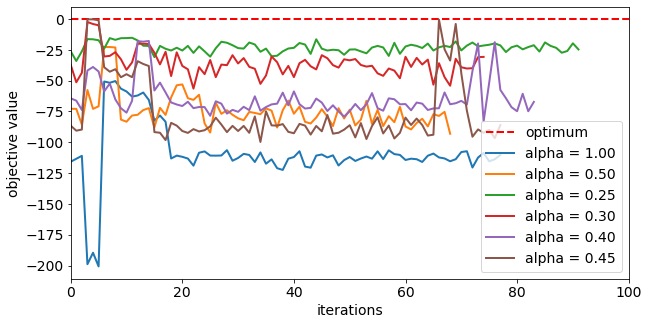

In [39]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [40]:
qaoa.ansatz.count_ops()

OrderedDict([('h', 10), ('PauliEvolution', 2)])

In [41]:
from qiskit import transpile

In [42]:
qc_basis = transpile(qaoa.ansatz, backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

In [43]:
gate_dict

OrderedDict([('cx', 90), ('u', 75)])

Finding the circuit cost

In [44]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 1018.618
Total cost for when alpha is 0.5: 901.114
Total cost for when alpha is 0.25: 1201.402
Total cost for when alpha is 0.3: 979.45
Total cost for when alpha is 0.4: 1096.9540000000002
Total cost for when alpha is 0.45: 1018.618


We evaluated the cost for different alphas, but we also need to see if we are not too far away from optimal even if the cost is least for any alpha. Based on that, we could conclude which alpha works best. We can see this from the plot itself and also from the cell output where we ran QAOA, but lets print the exact optimal value here.

In [45]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2545840656400742
The optimal value with alpha 0.5: -0.2621483674449223
The optimal value with alpha 0.25: -0.25468330914998205
The optimal value with alpha 0.3: -0.25510685899990904
The optimal value with alpha 0.4: -0.2538738783798635
The optimal value with alpha 0.45: -0.2545840656400742


alpha=0.5 seems best due to slightly lower cost and almost the same optimal value as alpha 1,alpha 0.25,alpha 0.3,alpha 0.4,alpha 0.45.This is because alpha=0.5 led to convergence much faster.

Circuit depth

In [46]:
qc_basis.depth()

54

Optimizer time

In [47]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 131.76461124420166
Optimizer time for alpha 0.5: 81.32381629943848
Optimizer time for alpha 0.25: 127.50998663902283
Optimizer time for alpha 0.3: 81.59485101699829
Optimizer time for alpha 0.4: 98.50591015815735
Optimizer time for alpha 0.45: 96.7710747718811


Using 'POWELL' optimizer and qasm simulator. We are using CVaR expectation and hence, created a list of alpha values

In [48]:
# set classical optimizer
maxiter = 100
optimizer = POWELL(maxiter=maxiter)

# set variational ansatz
#ansatz = RealAmplitudes(n, reps=1)
#m = ansatz.num_parameters

# set backend
backend_name = "qasm_simulator"  # use this for QASM simulator
# backend_name = 'aer_simulator_statevector'  # use this for statevector simlator
backend = Aer.get_backend(backend_name)

# run variational optimization for different values of alpha
alphas = [1.0, 0.50, 0.25,0.30,0.40,0.45]  # confidence levels to be evaluated

Fitting CVaR QAOA

In [49]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=backend,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1

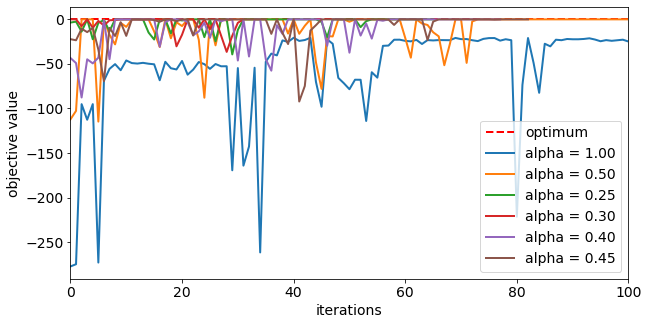

In [50]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [51]:
qaoa.ansatz.count_ops()

OrderedDict([('h', 10), ('PauliEvolution', 2)])

In [52]:
from qiskit import transpile

In [53]:
qc_basis = transpile(qaoa.ansatz, backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

In [54]:
gate_dict

OrderedDict([('cx', 90), ('u', 75)])

Finding the circuit cost

In [55]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 2128.378
Total cost for when alpha is 0.5: 1345.018
Total cost for when alpha is 0.25: 861.946
Total cost for when alpha is 0.3: 418.04200000000003
Total cost for when alpha is 0.4: 1018.618
Total cost for when alpha is 0.45: 1083.8980000000001


We evaluated the cost for different alphas, but we also need to see if we are not too far away from optimal even if the cost is least for any alpha. Based on that, we could conclude which alpha works best. We can see this from the plot itself and also from the cell output where we ran QAOA, but lets print the exact optimal value here.

In [56]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2538738783798635
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2535553101149617
The optimal value with alpha 0.45: -0.2535553101149617


alpha=0.3 seems best due to slightly lower cost and the same optimal value as alpha 0.5,alpha 0.25,alpha 1,alpha 0.4,alpha 0.45.This is because alpha=1 led to convergence much faster.

Circuit depth

In [57]:
qc_basis.depth()

54

Optimizer time

In [59]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 271.405072927475
Optimizer time for alpha 0.5: 137.3510820865631
Optimizer time for alpha 0.25: 88.57552790641785
Optimizer time for alpha 0.3: 48.08591890335083
Optimizer time for alpha 0.4: 119.34219193458557
Optimizer time for alpha 0.45: 118.68631100654602


Using 'GradientDescent' optimizer and qasm simulator. We are using CVaR expectation and hence, created a list of alpha values

In [61]:
# set classical optimizer
maxiter = 100
optimizer = GradientDescent(maxiter=maxiter)

# set variational ansatz
#ansatz = RealAmplitudes(n, reps=1)
#m = ansatz.num_parameters

# set backend
backend_name = "qasm_simulator"  # use this for QASM simulator
# backend_name = 'aer_simulator_statevector'  # use this for statevector simlator
backend = Aer.get_backend(backend_name)

# run variational optimization for different values of alpha
alphas = [1.0, 0.50, 0.25,0.30,0.40,0.45]  # confidence levels to be evaluated

Fitting CVaR QAOA

In [62]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=backend,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=0.0, x_6=1.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1

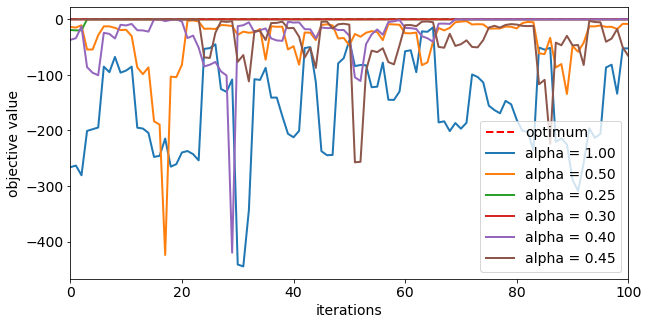

In [63]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [64]:
qaoa.ansatz.count_ops()

OrderedDict([('h', 10), ('PauliEvolution', 2)])

In [65]:
from qiskit import transpile

In [66]:
qc_basis = transpile(qaoa.ansatz, backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

In [67]:
gate_dict

OrderedDict([('cx', 90), ('u', 75)])

Finding the circuit cost

In [68]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 3930.106
Total cost for when alpha is 0.5: 3930.106
Total cost for when alpha is 0.25: 3930.106
Total cost for when alpha is 0.3: 3930.106
Total cost for when alpha is 0.4: 3930.106
Total cost for when alpha is 0.45: 3930.106


We evaluated the cost for different alphas, but we also need to see if we are not too far away from optimal even if the cost is least for any alpha. Based on that, we could conclude which alpha works best. We can see this from the plot itself and also from the cell output where we ran QAOA, but lets print the exact optimal value here.

In [69]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2535553101149617
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2538738783798635
The optimal value with alpha 0.45: -0.2535553101149617


Note: All the alpha cost and the same optimal value are same.This is because alpha=1 led to convergence much faster.

Circuit depth

In [70]:
qc_basis.depth()

54

Optimizer time

In [72]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 413.5184531211853
Optimizer time for alpha 0.5: 398.97144317626953
Optimizer time for alpha 0.25: 441.8885762691498
Optimizer time for alpha 0.3: 576.815952539444
Optimizer time for alpha 0.4: 473.0425684452057
Optimizer time for alpha 0.45: 435.4050235748291


Trying different fake backends and using noise models for the same experiment

The fake backends are built to mimic the behaviors of IBM Quantum systems using system snapshots. The system snapshots contain important information about the quantum system such as coupling map, basis gates, qubit properties (T1, T2, error rate, etc.) which are useful for testing the transpiler and performing noisy simulation of the system.

1- FakeMumbai backend

In [73]:
import os
from qiskit.providers.aer import QasmSimulator, AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeSydney, FakeMumbai
from qiskit.utils import QuantumInstance

In [74]:
device_backend = FakeMumbai()

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = AerSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()
seed=1234
algorithm_globals.random_seed = 1234
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                     coupling_map=coupling_map, noise_model=noise_model,shots=1024)

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 'set_unitary', 'snapshot', 'superop', 'sx', 'x']
  Instructions with noise: ['sx', 'reset', 'id', 'cx', 'x', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), 

In [75]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=qi,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1

Note: With the above noise model, results seem slightly different from what we got with the qasm simulator

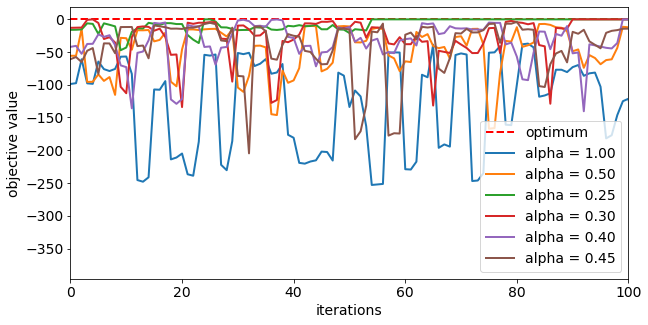

In [76]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [77]:
qc_basis = transpile(qaoa.ansatz, device_backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

gate_dict

OrderedDict([('cx', 196), ('u', 129)])

In [78]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 8029.4852
Total cost for when alpha is 0.5: 8029.4852
Total cost for when alpha is 0.25: 8029.4852
Total cost for when alpha is 0.3: 8029.4852
Total cost for when alpha is 0.4: 8029.4852
Total cost for when alpha is 0.45: 8029.4852


In [79]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2535553101149617
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2535553101149617
The optimal value with alpha 0.45: -0.2535553101149617


In [80]:
### Circuit depth ###

qc_basis.depth()

155

In [81]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 637.1163125038147
Optimizer time for alpha 0.5: 578.3009343147278
Optimizer time for alpha 0.25: 727.6712913513184
Optimizer time for alpha 0.3: 662.4516847133636
Optimizer time for alpha 0.4: 625.297794342041
Optimizer time for alpha 0.45: 604.5054678916931


2-FakeWashington device backend

In [82]:
import os
from qiskit.providers.aer import QasmSimulator, AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeWashington
from qiskit.utils import QuantumInstance

device_backend = FakeWashington()

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = AerSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()
seed=1234
algorithm_globals.random_seed = 1234
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                     coupling_map=coupling_map, noise_model=noise_model,shots=1024)

/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (260581.28986315246 > 2 * 80026.57875131005). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (115349.1827351713 > 2 * 56743.169831786116). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (260581.28986315246 > 2 * 80026.57875131005). Truncating to maximum value.
  warn("De

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 'set_unitary', 'snapshot', 'superop', 'sx', 'x']
  Instructions with noise: ['sx', 'reset', 'id', 'cx', 'x', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 

/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (0.00026058128986315243 > 2 * 8.002657875131006e-05). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/noise/device/models.py:264: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (0.0001153491827351713 > 2 * 5.674316983178612e-05). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"


In [83]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=qi,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2538738783798635
variable values: x_0=1.0, x_1

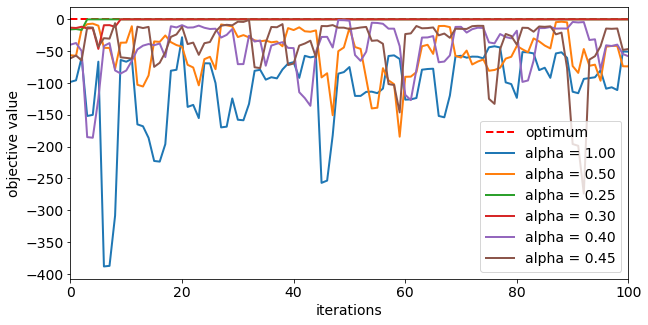

In [84]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [85]:
qc_basis = transpile(qaoa.ansatz, device_backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

gate_dict

OrderedDict([('cx', 205), ('u', 105)])

In [86]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 7937.018000000001
Total cost for when alpha is 0.5: 7937.018000000001
Total cost for when alpha is 0.25: 7937.018000000001
Total cost for when alpha is 0.3: 7937.018000000001
Total cost for when alpha is 0.4: 7937.018000000001
Total cost for when alpha is 0.45: 7937.018000000001


In [87]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2535553101149617
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2535553101149617
The optimal value with alpha 0.45: -0.2538738783798635


In [88]:
### Circuit depth ###

qc_basis.depth()

145

In [89]:
for alpha in alphas:
    x=results[alpha]
    print('Optimizer time for alpha '+ str(alpha)+ ': '+ str(x.min_eigen_solver_result.optimizer_time))

Optimizer time for alpha 1.0: 1030.1478934288025
Optimizer time for alpha 0.5: 1048.8074452877045
Optimizer time for alpha 0.25: 1177.4771401882172
Optimizer time for alpha 0.3: 1343.270408153534
Optimizer time for alpha 0.4: 1214.8388159275055
Optimizer time for alpha 0.45: 1096.2437045574188


3-FakeToronto device backend

In [90]:
import os
from qiskit.providers.aer import QasmSimulator, AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeToronto
from qiskit.utils import QuantumInstance

device_backend = FakeToronto()

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = AerSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

print(noise_model)
print()
seed=1234
algorithm_globals.random_seed = 1234
qi = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed,
                     coupling_map=coupling_map, noise_model=noise_model,shots=1024)

NoiseModel:
  Basis gates: ['cx', 'id', 'kraus', 'qerror_loc', 'quantum_channel', 'roerror', 'rz', 'save_amplitudes', 'save_amplitudes_sq', 'save_clifford', 'save_density_matrix', 'save_expval', 'save_expval_var', 'save_matrix_product_state', 'save_probabilities', 'save_probabilities_dict', 'save_stabilizer', 'save_state', 'save_statevector', 'save_statevector_dict', 'save_superop', 'save_unitary', 'set_density_matrix', 'set_matrix_product_state', 'set_stabilizer', 'set_statevector', 'set_superop', 'set_unitary', 'snapshot', 'superop', 'sx', 'x']
  Instructions with noise: ['sx', 'reset', 'id', 'cx', 'x', 'measure']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), 

In [91]:
%%time
# dictionaries to store optimization progress and results
objectives = {alpha: [] for alpha in alphas}  # set of tested objective functions w.r.t. alpha
results = {}  # results of minimum eigensolver w.r.t alpha

# callback to store intermediate results
def callback(i, params, obj, stddev, alpha):
    # we translate the objective from the internal Ising representation
    # to the original optimization problem
    objectives[alpha] += [-(obj + offset)]


# loop over all given alpha values
for alpha in alphas:

    # initialize CVaR_alpha objective
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
#     cvar_exp.compute_variance = lambda x: [0]  # to be fixed in PR #1373

    # initialize VQE using CVaR
    qaoa = QAOA(
        expectation=cvar_exp,
        optimizer=optimizer,
        quantum_instance=qi,
        callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha),
    )

    # initialize optimization algorithm based on CVaR-VQE
    opt_alg = MinimumEigenOptimizer(qaoa)

    # solve problem
    results[alpha] = opt_alg.solve(qp)

    # print results
    print("alpha = {}:".format(alpha))
    print(results[alpha].prettyprint())
    print()

alpha = 1.0:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.5:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.25:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.3:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.4:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0, x_4=0.0, x_5=1.0, x_6=0.0, x_7=0.0, x_8=1.0, x_9=1.0
status: SUCCESS

alpha = 0.45:
objective function value: -0.2535553101149617
variable values: x_0=1.0, x_1

In [92]:
# plot resulting history of objective values
plt.figure(figsize=(10, 5))
plt.plot([0, maxiter], [opt_result.fval, opt_result.fval], "r--", linewidth=2, label="optimum")
for alpha in alphas:
    plt.plot(objectives[alpha], label="alpha = %.2f" % alpha, linewidth=2)
plt.legend(loc="lower right", fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel("iterations", fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("objective value", fontsize=14)
plt.show()

In [93]:
qc_basis = transpile(qaoa.ansatz, device_backend,optimization_level=3, basis_gates=['cx','u'])
# qc_basis.draw()
gate_dict=qc_basis.count_ops()

gate_dict

OrderedDict([('cx', 186), ('u', 147)])

In [94]:
task_price=0.25
cost_cx = 0.0001
cost_u = 0.00005
price_per_shot = (cost_cx * gate_dict.get('cx')) + (cost_u * gate_dict.get('u'))
shotsin=1024
for alpha in alphas:
    optim_evals=len(objectives[alpha])
    print('Total cost for when alpha is '+str(alpha)+': '+ str((optim_evals*shotsin*price_per_shot)+task_price))
# total_cost = (optim_evals*shotsin*price_per_shot)+task_price

Total cost for when alpha is 1.0: 7998.6628
Total cost for when alpha is 0.5: 7998.6628
Total cost for when alpha is 0.25: 7998.6628
Total cost for when alpha is 0.3: 7998.6628
Total cost for when alpha is 0.4: 7998.6628
Total cost for when alpha is 0.45: 7998.6628


In [95]:
for alpha in alphas:
    print('The optimal value with alpha '+str(alpha)+': '+str(results[alpha].fval))

The optimal value with alpha 1.0: -0.2535553101149617
The optimal value with alpha 0.5: -0.2535553101149617
The optimal value with alpha 0.25: -0.2535553101149617
The optimal value with alpha 0.3: -0.2535553101149617
The optimal value with alpha 0.4: -0.2535553101149617
The optimal value with alpha 0.45: -0.2535553101149617


### Conclusion : 1) Fake Backend Washington was a poor choice where it has large no of Qubits i.e.127 which is not require for our used cases.
### 2) For a particular case of Optimisers it is showing different alpha's cost when trying on simulator and on fake backends